In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel("datos/Disponibilidad_Real.xlsx")
data.head()

,Fecha,Recurso,Tipo Generación,Código Agente,0,1,2,3,4,5,...,16,17,18,19,20,21,22,23,Archivo,Código Recurso
0,2000-01-01,BAJO ANCHICAYA,HIDRAULICA,EPSG,13000.0,13000.0,13000.0,13000.0,13000.0,13000.0,...,13000.0,13000.0,13000.0,13000.0,13000.0,13000.0,13000.0,13000.0,Disponibilidad Real (kW) 2000,NaN
1,2000-01-01,BETANIA,HIDRAULICA,CHBG,540000.0,540000.0,540000.0,540000.0,540000.0,540000.0,...,540000.0,540000.0,540000.0,540000.0,540000.0,540000.0,540000.0,540000.0,Disponibilidad Real (kW) 2000,NaN
2,2000-01-01,CALIMA,HIDRAULICA,EPSG,120000.0,120000.0,120000.0,120000.0,120000.0,120000.0,...,120000.0,120000.0,120000.0,120000.0,120000.0,120000.0,120000.0,120000.0,Disponibilidad Real (kW) 2000,NaN
3,2000-01-01,CASALCO,HIDRAULICA,EMGG,544000.0,544000.0,544000.0,544000.0,544000.0,544000.0,...,544000.0,544000.0,544020.0,544000.0,544000.0,544010.0,544000.0,544000.0,Disponibilidad Real (kW) 2000,NaN
4,2000-01-01,CHIVOR,HIDRAULICA,CHVG,750000.0,750000.0,750000.0,750000.0,750000.0,750000.0,...,750000.0,750000.0,750000.0,750000.0,750000.0,750000.0,750000.0,750000.0,Disponibilidad Real (kW) 2000,NaN


In [3]:
data.shape

(451925, 30)

In [4]:
# list(data)

In [5]:
def melt_df(df):
    #Hours
#     hours= [i for i in range(0,24)]
    hours = list(range(0, 24))
    
    #Convert hours from integers to string, column names
    hours_str = list(map(str, hours))
            
    #Melt original dataframe
    df_melt = pd.melt(df,
                      id_vars=['Fecha', 'Recurso', 'Código Recurso', 'Tipo Generación','Código Agente', 'Archivo'],
                      value_vars=hours_str,
                      var_name='Hour',
                      value_name='Disponibilidad')
    
    #Convert string to float
    df_melt["Hour"] = pd.to_numeric(df_melt["Hour"])
    
    #Add hours to the date which only had considered the day
    df_melt['Fecha'] = pd.to_datetime(df_melt['Fecha'], format="%Y-%m-%d")
    df_melt["Fecha"] = df_melt["Fecha"] + pd.to_timedelta(df_melt["Hour"],unit='H')
    
    #Order de data
    df_melt.sort_values(by=['Fecha'], inplace=True, ascending=True)
    
    #Reset index
    df_melt=df_melt.reset_index(drop=True).drop('Hour', axis = 1).set_index('Fecha')
    
    df_melt['Date'] = df_melt.index.date
    df_melt['Year'] = df_melt.index.year
    df_melt['Month'] = df_melt.index.month
    df_melt['Day'] = df_melt.index.day
    df_melt['Weekday'] = df_melt.index.weekday # Monday=0
    df_melt['Hour'] = df_melt.index.hour

    return df_melt

In [6]:
df_raw = melt_df(data)
df_raw

,Recurso,Código Recurso,Tipo Generación,Código Agente,Archivo,Disponibilidad,Date,Year,Month,Day,Weekday,Hour
Fecha,,,,,,,,,,,,
2000-01-01 00:00:00,BAJO ANCHICAYA,NaN,HIDRAULICA,EPSG,Disponibilidad Real (kW) 2000,13000.0,2000-01-01,2000,1,1,5,0
2000-01-01 00:00:00,ZIPAEMG 5,NaN,TERMICA,EMGG,Disponibilidad Real (kW) 2000,62000.0,2000-01-01,2000,1,1,5,0
2000-01-01 00:00:00,CARTAGENA 1,NaN,TERMICA,TRCG,Disponibilidad Real (kW) 2000,59000.0,2000-01-01,2000,1,1,5,0
2000-01-01 00:00:00,CARTAGENA 2,NaN,TERMICA,TRCG,Disponibilidad Real (kW) 2000,47000.0,2000-01-01,2000,1,1,5,0
2000-01-01 00:00:00,CARTAGENA 3,NaN,TERMICA,TRCG,Disponibilidad Real (kW) 2000,63000.0,2000-01-01,2000,1,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-15 23:00:00,PORCE II,NaN,HIDRAULICA,EPMG,Disponibilidad Real (kW) 2021,0.0,2021-07-15,2021,7,15,3,23
2021-07-15 23:00:00,PLAYAS,NaN,HIDRAULICA,EPMG,Disponibilidad Real (kW) 2021,0.0,2021-07-15,2021,7,15,3,23
2021-07-15 23:00:00,PAGUA,NaN,HIDRAULICA,ENDG,Disponibilidad Real (kW) 2021,0.0,2021-07-15,2021,7,15,3,23


In [7]:
list(df_raw)

['Recurso',
 'Código Recurso',
 'Tipo Generación',
 'Código Agente',
 'Archivo',
 'Disponibilidad',
 'Date',
 'Year',
 'Month',
 'Day',
 'Weekday',
 'Hour']

In [8]:
def custom_label(year, month):
    return str(year) + '-' + str(month).rjust(2, '0')
        
df_raw['Year-Month'] = df_raw.apply(lambda x: custom_label(x['Year'],x['Month']),axis=1)

In [28]:
df=df_raw[df_raw['Year']<2021]

In [29]:
# df.to_csv('datos/Disponibilidad_Real_T.csv', index=False)

In [30]:
df.head()

,Recurso,Código Recurso,Tipo Generación,Código Agente,Archivo,Disponibilidad,Date,Year,Month,Day,Weekday,Hour,Year-Month
Fecha,,,,,,,,,,,,,
2000-01-01,BAJO ANCHICAYA,NaN,HIDRAULICA,EPSG,Disponibilidad Real (kW) 2000,13000.0,2000-01-01,2000,1,1,5,0,2000-01
2000-01-01,ZIPAEMG 5,NaN,TERMICA,EMGG,Disponibilidad Real (kW) 2000,62000.0,2000-01-01,2000,1,1,5,0,2000-01
2000-01-01,CARTAGENA 1,NaN,TERMICA,TRCG,Disponibilidad Real (kW) 2000,59000.0,2000-01-01,2000,1,1,5,0,2000-01
2000-01-01,CARTAGENA 2,NaN,TERMICA,TRCG,Disponibilidad Real (kW) 2000,47000.0,2000-01-01,2000,1,1,5,0,2000-01
2000-01-01,CARTAGENA 3,NaN,TERMICA,TRCG,Disponibilidad Real (kW) 2000,63000.0,2000-01-01,2000,1,1,5,0,2000-01


<AxesSubplot:xlabel='Date', ylabel='Disponibilidad'>

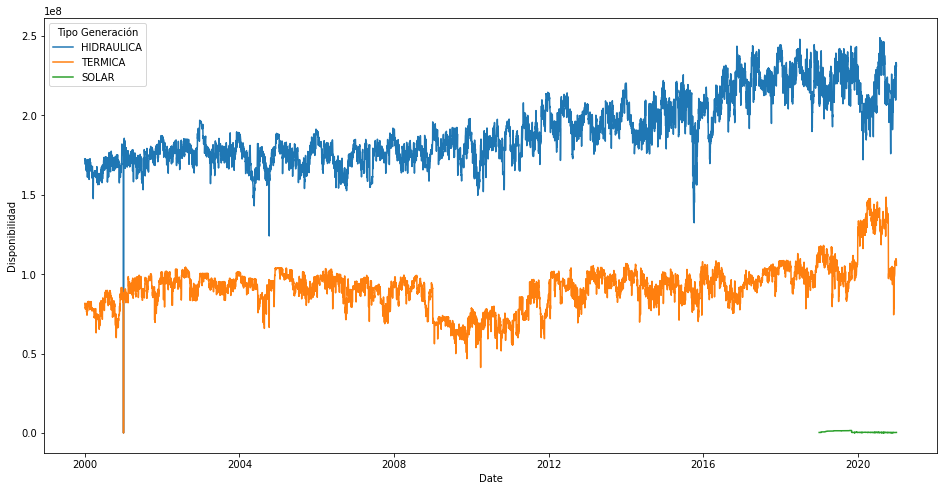

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

data=df.groupby(["Date", "Tipo Generación"])["Disponibilidad"].sum().reset_index()

plt.figure(figsize=(16, 8))
sns.lineplot(x="Date", y="Disponibilidad", hue="Tipo Generación", data=data)

In [32]:
data1 = df.groupby(['Recurso', "Tipo Generación"])["Disponibilidad"].sum().reset_index()
data1 = data1.sort_values("Disponibilidad", ascending=False)
data1.head(10)

,Recurso,Tipo Generación,Disponibilidad
72,SAN CARLOS,HIDRAULICA,2.033054e+11
49,GUAVIO,HIDRAULICA,1.988658e+11
25,CHIVOR,HIDRAULICA,1.590438e+11
78,TEBSAB,TERMICA,1.356589e+11
56,PAGUA,HIDRAULICA,1.027572e+11
47,GUATAPE,HIDRAULICA,9.700819e+10
48,GUATRON,HIDRAULICA,8.724526e+10
18,BETANIA,HIDRAULICA,8.554675e+10
89,TERMOSIERRAB,TERMICA,6.215838e+10
0,ALBAN,HIDRAULICA,5.857566e+10


In [33]:
df.Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
      dtype=int64)

In [14]:
data1 = df[df['Year']==2020].groupby(['Recurso'])["Disponibilidad"].sum().reset_index()
top_recursos = list(data1.sort_values("Disponibilidad", ascending=False)['Recurso'][:10])

data=df.groupby(["Year-Month", 'Recurso', "Tipo Generación"])["Disponibilidad"].sum().reset_index()
data2=data[data['Recurso'].isin(top_recursos)]

In [15]:
top_recursos

['TEBSAB',
 'SAN CARLOS',
 'GUAVIO',
 'SOGAMOSO',
 'PORCE III',
 'CHIVOR',
 'PAGUA',
 'GUATAPE',
 'GUATRON',
 'BETANIA']

In [16]:
data2=data[data['Recurso'].isin(top_recursos)]
data2

,Year-Month,Recurso,Tipo Generación,Disponibilidad
8,2000-01,BETANIA,HIDRAULICA,401742000.0
14,2000-01,CHIVOR,HIDRAULICA,552214560.0
22,2000-01,GUATAPE,HIDRAULICA,413067640.0
23,2000-01,GUATRON,HIDRAULICA,379811900.0
24,2000-01,GUAVIO,HIDRAULICA,826554850.0
...,...,...,...,...
13766,2020-12,GUAVIO,HIDRAULICA,869186465.0
13771,2020-12,PAGUA,HIDRAULICA,245322595.0
13778,2020-12,PORCE III,HIDRAULICA,509072081.0
13784,2020-12,SAN CARLOS,HIDRAULICA,869741162.0


In [17]:
data=df.groupby(['Recurso', "Tipo Generación"])["Disponibilidad"].sum().sort_values("Disponibilidad", ascending=False)
data.head(10)

c:\users\jairoruiz\documents\github\ds4a_team88\env\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only
  """Entry point for launching an IPython kernel.


ValueError: No axis named Disponibilidad for object type Series

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

data1 = df[df['Year']==2020].groupby(['Recurso'])["Disponibilidad"].sum().reset_index()
top_recursos = list(data1.sort_values("Disponibilidad", ascending=False)['Recurso'][:5])

data=df.groupby(["Year-Month", 'Recurso', "Tipo Generación"])["Disponibilidad"].sum().reset_index()
data2=data[data['Recurso'].isin(top_recursos)]

plt.figure(figsize=(16, 8))
plt.xticks(np.arange(0, len(data2)+1, 12), rotation=90)

sns.lineplot(x="Year-Month", y="Disponibilidad", hue='Recurso', style="Tipo Generación", data=data2)